In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # только для бустинга
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [66]:
from sklearn.metrics import r2_score

In [72]:
train = pd.read_csv("C:\\ВОВИНО\\GEEKBRAINS\\AlgorithmsPython\\tutors-expected-math-exam-results\\train.csv")
train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [73]:
test = pd.read_csv("C:\\ВОВИНО\\GEEKBRAINS\\AlgorithmsPython\\tutors-expected-math-exam-results\\test.csv")
test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.5000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.8780,8.043929,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.9868,1.772213,0.0,0.00,2.0,3.00,10.0
lesson_price,10000.0,1699.1050,524.886654,200.0,1300.00,1500.0,2150.00,3950.0
qualification,10000.0,1.7195,0.792264,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.3750,0.484147,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.1329,0.339484,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.1096,0.312406,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.0537,0.225436,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.0321,0.176274,0.0,0.00,0.0,0.00,1.0


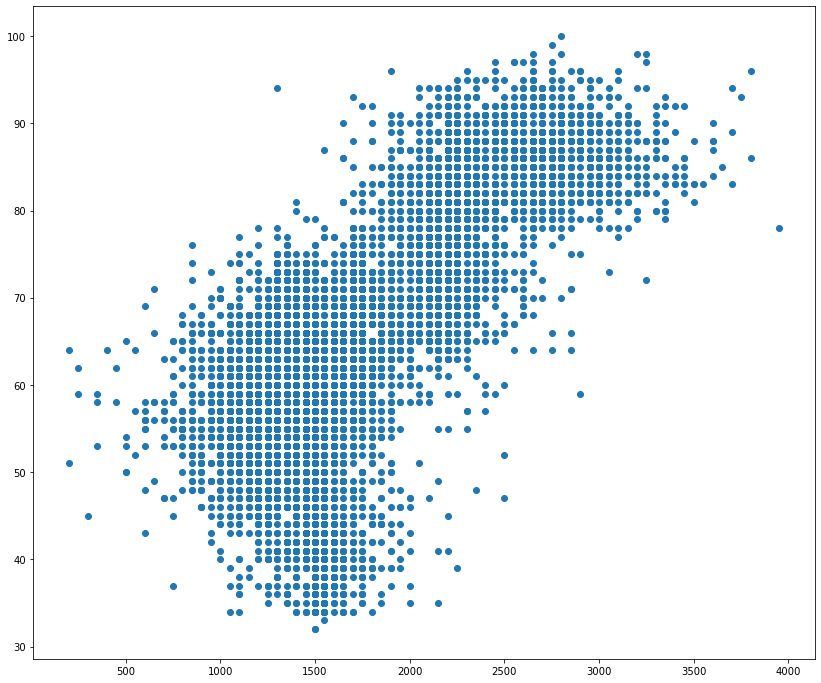

In [167]:
plt.scatter(train.lesson_price,train.mean_exam_points)

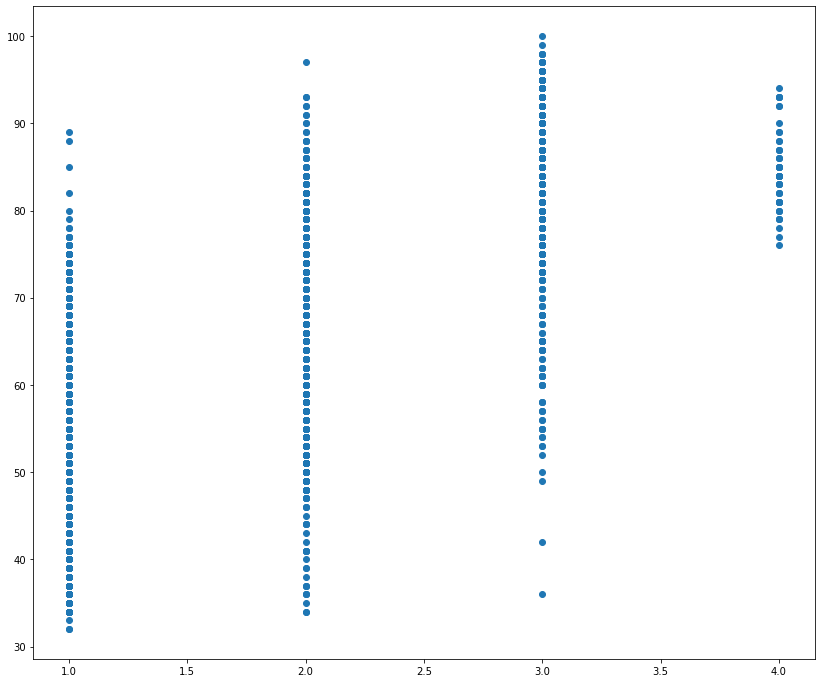

In [168]:
plt.scatter(train.qualification, train.mean_exam_points)

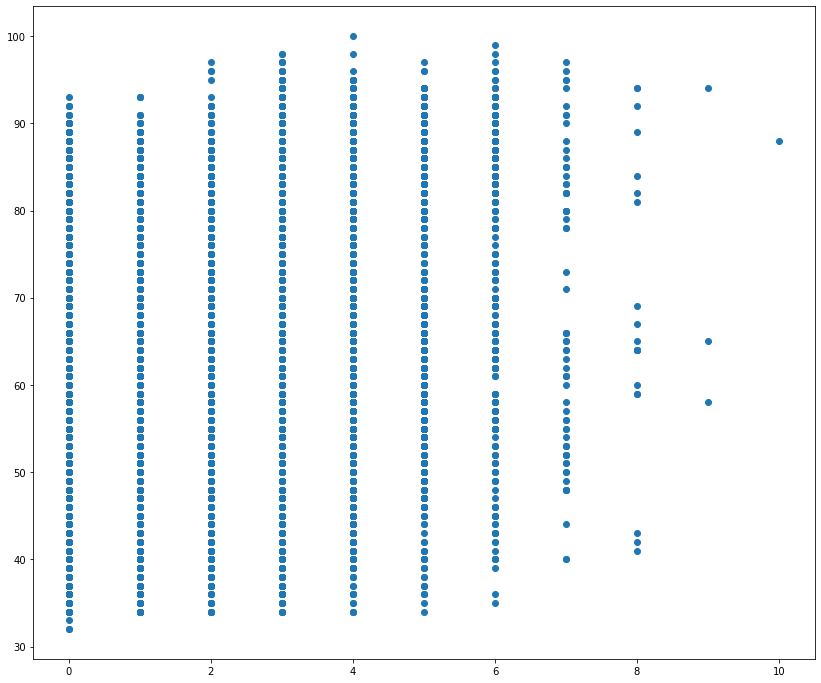

In [169]:
plt.scatter(train.years_of_experience, train.mean_exam_points)

In [185]:
train['total_score'] = (train['years_of_experience']+1) * (train['lesson_price']*0.72) * (train['qualification']*0.76)

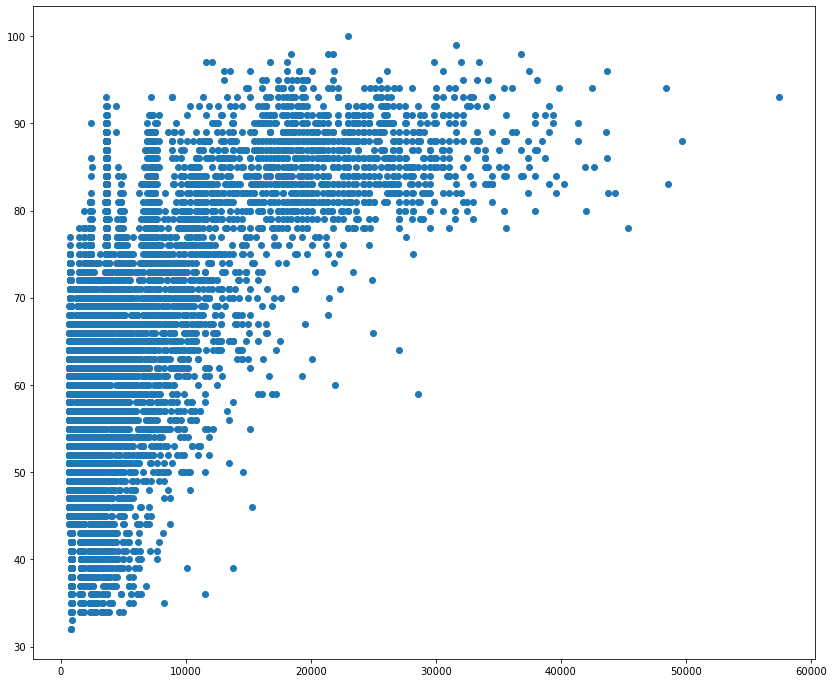

In [186]:
plt.scatter(train['total_score'], train['mean_exam_points'])

In [187]:
corr_matrix = train.corr()
corr_matrix

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,total_score
Id,1.000000,-0.004596,0.007408,-0.004433,-0.005077,-0.010570,0.002694,-0.000016,0.017723,-0.014869,-0.004482,0.004121,0.005707
age,-0.004596,1.000000,0.059947,-0.005462,-0.000976,0.004045,0.001250,-0.005026,-0.012546,0.013130,0.010606,-0.007646,0.059880
years_of_experience,0.007408,0.059947,1.000000,0.248311,0.194097,0.008451,0.004246,-0.001722,-0.010241,-0.011129,0.018640,0.205417,0.655931
lesson_price,-0.004433,-0.005462,0.248311,1.000000,0.790087,-0.006432,0.005130,-0.004860,-0.012018,0.010525,-0.001142,0.721179,0.779602
qualification,-0.005077,-0.000976,0.194097,0.790087,1.000000,0.007529,-0.002683,-0.007504,-0.008047,0.003610,-0.005109,0.755963,0.707595
physics,-0.010570,0.004045,0.008451,-0.006432,0.007529,1.000000,0.019852,0.000661,0.004238,0.001904,0.004867,0.187726,0.001751
chemistry,0.002694,0.001250,0.004246,0.005130,-0.002683,0.019852,1.000000,0.007866,0.009974,-0.004447,-0.008079,0.017825,0.004219
biology,-0.000016,-0.005026,-0.001722,-0.004860,-0.007504,0.000661,0.007866,1.000000,0.010146,-0.013042,0.010995,0.023022,-0.013194
english,0.017723,-0.012546,-0.010241,-0.012018,-0.008047,0.004238,0.009974,0.010146,1.000000,-0.008148,-0.004560,0.013174,-0.015839
geography,-0.014869,0.013130,-0.011129,0.010525,0.003610,0.001904,-0.004447,-0.013042,-0.008148,1.000000,-0.005049,0.014401,-0.001030


<AxesSubplot:>

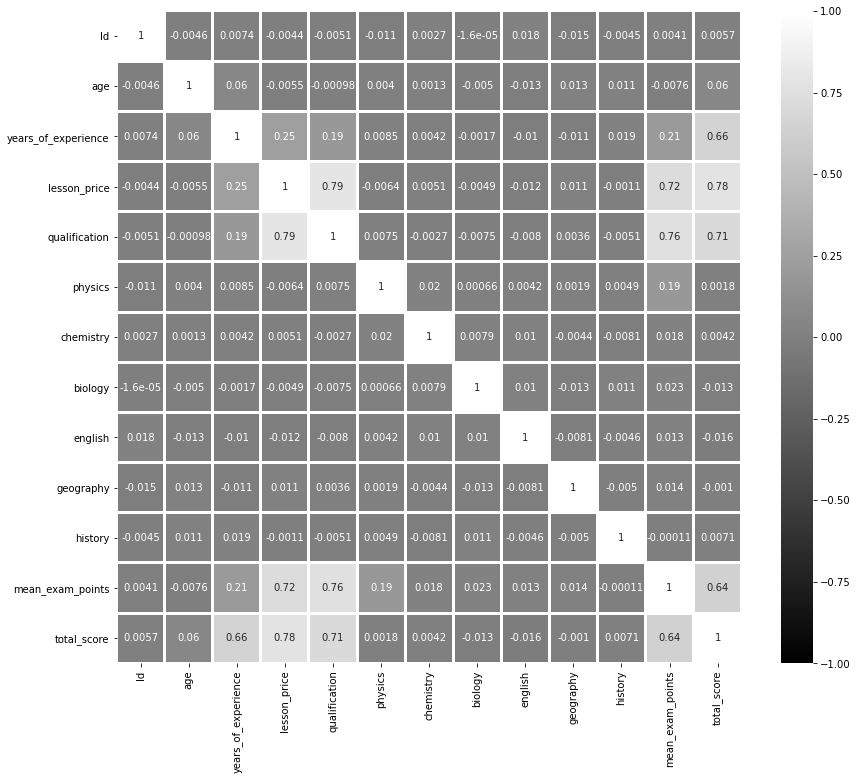

In [188]:
plt.rcParams['figure.figsize'] = (14.0, 12.0)
sns.heatmap(corr_matrix, annot = True,fmt='.2g', vmin=-1, vmax=1, center= 0, linewidths = 2, cmap = 'gray')

In [175]:
y = np.array(train['mean_exam_points'])

In [176]:
X = np.array(train.drop(['Id', 'mean_exam_points'], axis=1))


In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
train.isna().sum()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
dtype: int64

In [16]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    return np.array([sum([eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [17]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction) ** 2)) / len(y_real)

In [18]:
# def mean_squared_error(y_real, prediction):
#     return np.sum(np.power(2, (y_real - prediction))) / y_real.shape[0]

In [19]:
y_test.shape[0]

3000

In [20]:
def bias(z, y):
    return 2 * (z - y)

In [21]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):

    # eta - скорость обучения
    # Деревья будем записывать в список
    trees = []

    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []

    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль,
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)

            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)

            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))

            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)

    return trees, train_errors, test_errors

In [189]:
%%time
# Число деревьев в ансамбле
n_trees = 13

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3
# Шаг
eta = 0.5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Wall time: 3min 6s


In [190]:
test_prediction = gb_predict(X_test, trees, coefs, eta)

In [191]:
r2_score(y_test, test_prediction)

0.7712664512220735

In [192]:
submit_df = pd.read_csv("C:\\ВОВИНО\\GEEKBRAINS\\AlgorithmsPython\\tutors-expected-math-exam-results\\submission_example.csv")

In [194]:
test = test.drop('Id', axis=1)

In [195]:
test['total_score'] = (test['years_of_experience']+1) * (test['lesson_price']*0.72) * (test['qualification']*0.76)

In [196]:
test_ = np.array(test)

In [197]:
y_pred = gb_predict(test_, trees, coefs, eta)

In [199]:
submit_df['mean_exam_points'] = y_pred

In [200]:
submit_df.to_csv('VSmirnov_pred.csv', index=False, encoding='utf-8', sep=',')